## __Poker Hands 2__

__Advanced Probability__

We will use our `combinatorics.py` module to answer more questions about our previous poker hands.

- [Expected Hands](#expected-hands)

- [Prize System](#prize-system)

- [Game](#game)

<h2 id="expected-hands"><strong>Expected Hands</strong></h2>

First, let us calculate the expected number of random draws from a 52-card deck until we obtain each hand.

In [1]:
import sys
import os
import random
import matplotlib.pyplot as plt

root_dir = os.path.abspath('..')
sys.path.insert(0, root_dir)

# The script from this project's root directory
import combinatorics as comb

help(comb)
print(comb.__file__)

Help on module combinatorics:

NAME
    combinatorics

FUNCTIONS
    choose(n, r)
        `n` choose `r` (without replacement)
    
    factorial(n)
        Returns `n!`
    
    multichoose(n, r)
        Select `r` from `n` varieties (with replacement)
    
    permute(n, r=None)
        `n` permute `r` (without replacement)
        
        default (r = n)

FILE
    c:\users\jeffrey\documents\dev\projects\combinatorics\combinatorics.py


c:\Users\Jeffrey\Documents\Dev\Projects\Combinatorics\combinatorics.py


In [2]:
# Useful shorthands
TOTAL_HANDS = comb.choose(52, 5)
ranks = 13
suits = 4

# All hand types
class Hands:
	HIGH_CARD = 'High Card'
	ONE_PAIR = 'One Pair'
	TWO_PAIR = 'Two Pair'
	THREE_OF_A_KIND = 'Three of a Kind'
	STRAIGHT = 'Straight'
	FLUSH = 'Flush'
	FULL_HOUSE = 'Full House'
	FOUR_OF_A_KIND = 'Four of a Kind'
	STRAIGHT_FLUSH = 'Straight Flush'
	ROYAL_FLUSH = 'Royal Flush'

# Ordered hand types (worst to best)
hand_rankings = [
	Hands.HIGH_CARD,
	Hands.ONE_PAIR,
	Hands.TWO_PAIR,
	Hands.THREE_OF_A_KIND,
	Hands.STRAIGHT,
	Hands.FLUSH,
	Hands.FULL_HOUSE,
	Hands.FOUR_OF_A_KIND,
	Hands.STRAIGHT_FLUSH,
	Hands.ROYAL_FLUSH
]

# We will map to the total combinations of cards that produce each hand (like we calculated previously)
hand_combinations = {}
hand_combinations[Hands.HIGH_CARD] = (comb.choose(ranks, 5) - 10) * (suits**5 - 4)
hand_combinations[Hands.ONE_PAIR] = comb.choose(ranks, 1) * comb.choose(suits, 2) * comb.choose(ranks-1, 3) * suits**3
hand_combinations[Hands.TWO_PAIR] = comb.choose(ranks, 2) * comb.choose(suits, 2)**2 * (ranks-2) * suits
hand_combinations[Hands.THREE_OF_A_KIND] = comb.choose(ranks, 1) * comb.choose(suits, 3) * comb.choose(ranks-1, 2) * suits**2
hand_combinations[Hands.STRAIGHT] = 10 * suits**5 - (10 * suits)
hand_combinations[Hands.FLUSH] = suits * comb.choose(ranks, 5) - (10 * suits)
hand_combinations[Hands.FULL_HOUSE] = comb.choose(ranks, 1) * comb.choose(suits, 3) * comb.choose(ranks-1, 1) * comb.choose(suits, 2)
hand_combinations[Hands.FOUR_OF_A_KIND] = comb.choose(ranks, 1) * comb.choose(ranks-1, 1) * suits
hand_combinations[Hands.STRAIGHT_FLUSH] = 9 * suits
hand_combinations[Hands.ROYAL_FLUSH] = suits

print(f'{"Hand Rank":>15}    Total Hands')
for hand, total in hand_combinations.items():
	print(f'{hand:>15} -> {total}')


      Hand Rank    Total Hands
      High Card -> 1302540
       One Pair -> 1098240
       Two Pair -> 123552
Three of a Kind -> 54912
       Straight -> 10200
          Flush -> 5108
     Full House -> 3744
 Four of a Kind -> 624
 Straight Flush -> 36
    Royal Flush -> 4


## __The Geometric Distribution__

Expresses the probability of getting exactly one _success_ after $k$ Bernoulli trials (an experiment with two outcomes: __success__ or __failure__),  
where the probability of success for each independent attempt is $p$.

Let $X$ be the random variable associated with the outcomes of drawing a 5-card poker hand.

Let $p$ be the probability of drawing a particular 5-card poker hand.

Then, $\text{P}[X = k] = (1-p)^{k-1} p$, &emsp; where $k \ge 1$

In other words, we drew $k-1$ hands that we did not want, but on the $k^{\text{th}}$ draw we got what we were looking for.

The mean of this distribution will represent how many hands we must draw, on average, from a shuffled 52-card deck until we obtain the desired hand rank.

$$ \begin{align*}
E[X] &= \sum_{x\in S_X} x \cdot P(x) \\ \\
&= \sum_{k=1}^{\infty} k (1-p)^{k-1} p \\ \\
&= p \sum_{k=1}^{\infty} k (1-p)^{k-1} \\ \\
\end{align*}
$$

The equation appears similar to a geometric series: $a + ar + ar^2 + \dots$  
with an extra $k$ term scaling with each term.

We will now modify the closed-form formula of the geometric series ([proof](https://en.wikipedia.org/wiki/Geometric_series#Convergence_of_the_series_and_its_proof)).

We have:
$$ \begin{align*}
\sum_{k=1}^{\infty} r^k &= \frac{1}{1-r} \quad (\textsf{\small for} \ |r| \lt 1) \\ \\
&\textsf{\small Differentiating both sides with respect to r, we get:} \\ \\
\sum_{k=1}^{\infty} kr^{k-1} &= \frac{d}{dr} [(1-r)^{-1}] = - (-1) (1-r)^{-2} = \frac{1}{(1-r)^2} \\ \\
&\textsf{\small Next, we substitute} \ r = (1-p) \ \textsf{into the equation} \\ \\
\sum_{k=1}^{\infty} k(1-p)^{k-1} &= \frac{1}{[1-(1-p)]^2} = \frac{1}{p^2} \quad (\textsf{\small for} \ |1-p| \lt 1) \\ \\
\end{align*}
$$

Since $p$ is a probability, $p \lt 1 \rightarrow (1-p) \lt 1$

Therefore, we can substitute this result back into our original equation:

$$ \begin{align*}
E[X] &= p \sum_{k=1}^{\infty} k (1-p)^{k-1} \\ \\
&= p \cdot \frac{1}{p^2} \\ \\
&= \frac{1}{p}
\end{align*}
$$

Consequently, we can expect (on average) to draw a type of hand with probability $p$ after $\frac{1}{p}$ draws from a shuffled 52-card deck.

In [3]:
# Now, we can calculate average draws before first hand
for hand, total in hand_combinations.items():
	p = total / TOTAL_HANDS # probability of drawing this hand
	average_draws = 1 / p 	# expected number of 5 card draws until receiving the hand type
	
	print(f'{hand:>15} -> {average_draws:.0f}') # round up to int

      High Card -> 2
       One Pair -> 2
       Two Pair -> 21
Three of a Kind -> 47
       Straight -> 255
          Flush -> 509
     Full House -> 694
 Four of a Kind -> 4165
 Straight Flush -> 72193
    Royal Flush -> 649740


<h2 id="prize-system"><strong>Prize System</strong></h2>

Let's assign a prize to each poker hand—a number of points awarded for drawing a particular hand type.

We will start by assigning 100 points to the lowest hand rank (High Card), and award an additional 100 points for each better hand in the hierarchy.

In [4]:
hand_prize = {}
for i, hand_type in enumerate(hand_rankings):
	hand_prize[hand_type] = 100 * (i+1)

print(f'{"Hand":>15}    Prize ($)')
for hand, prize in hand_prize.items():
	print(f'{hand:>15} -> {prize}')

           Hand    Prize ($)
      High Card -> 100
       One Pair -> 200
       Two Pair -> 300
Three of a Kind -> 400
       Straight -> 500
          Flush -> 600
     Full House -> 700
 Four of a Kind -> 800
 Straight Flush -> 900
    Royal Flush -> 1000


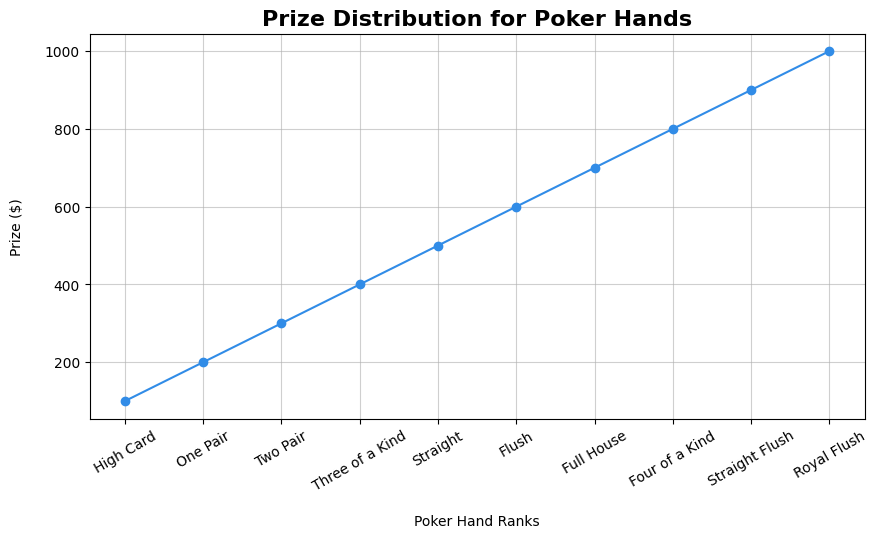

In [5]:
hands = hand_prize.keys()
prizes = hand_prize.values()

# Let's plot a line graph
def plot_hand_data(x_values, y_values, xlabel, ylabel, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='#318ce7')
    
    plt.xlabel(xlabel, labelpad=15)
    plt.ylabel(ylabel, labelpad=15)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.6)
    plt.xticks(rotation=30)
    plt.show()

plot_hand_data(hands, prizes, 'Poker Hand Ranks', 'Prize ($)', 'Prize Distribution for Poker Hands')

Next, let's find which hand rank has the best _value_.

We define value as its `prize points` $\times$ the `probability` of drawing such a hand.

In [6]:
hand_value = {}

# Value = probability * prize
print(f'{"Hand":>15}    Value')
for hand, prize in hand_prize.items():
	p = hand_combinations[hand] / TOTAL_HANDS
	value = p * prize
	hand_value[hand] = value
	print(f'{hand:>15} -> {value:.4f}')

           Hand    Value
      High Card -> 50.1177
       One Pair -> 84.5138
       Two Pair -> 14.2617
Three of a Kind -> 8.4514
       Straight -> 1.9623
          Flush -> 1.1792
     Full House -> 1.0084
 Four of a Kind -> 0.1921
 Straight Flush -> 0.0125
    Royal Flush -> 0.0015


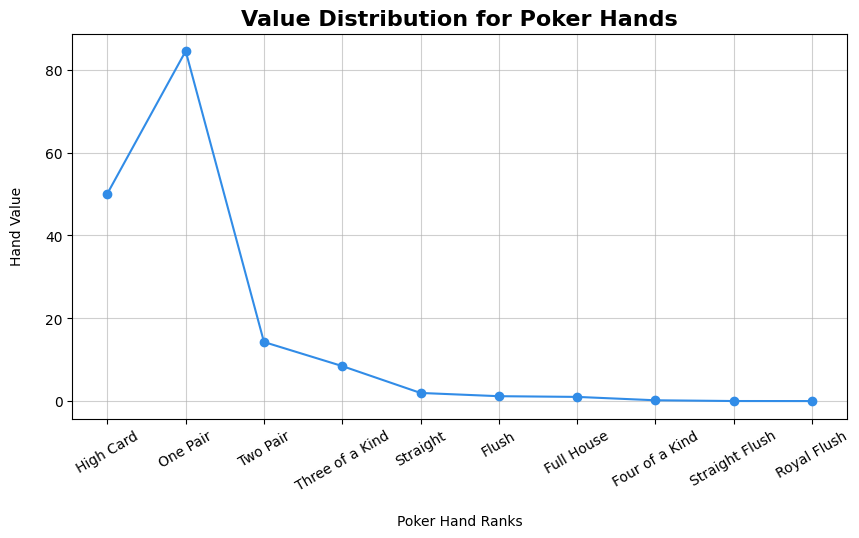

In [7]:
values = hand_value.values()

# Line graph
plot_hand_data(hands, values, 'Poker Hand Ranks', 'Hand Value', 'Value Distribution for Poker Hands')

We can tell our current prize system is wildly imbalanced!

`One pair` and `high card` hands will earn us the greatest prize over time, as despite their lower absolute prize score, they occur much more frequently than the others.

To make every hand rank hold equal value, we must account for probability.

Let $v_i$ be the value of the $i_{th}$ poker hand in the hierarchy.

We have:

$$v_i = c_i \cdot p_i$$

Where $p_i$ is the probability to draw hand type $i$, and $c_i$ is the prize for hand type $i$.

Set $c_i = k \cdot \dfrac{1}{p_i}$, where $k$ is some constant.

Then, 

$$v_i = k \cdot \dfrac{1}{p_i} \cdot p_i = k, \quad \forall_i$$


Now, let's say we wanted the highest ranking hand (the `royal flush`) to earn a prize of $\$1000$.

We would need to solve:

$$ \begin{align*}
c_{\text{royal}} &= k \cdot \dfrac{1}{p_{\text{royal}}} \\ \\ 

k &= 1000 \cdot p_{\text{royal}}
\end{align*}
$$

In [8]:
# Probability of drawing a royal flush
p_royal_flush = hand_combinations[Hands.ROYAL_FLUSH] / TOTAL_HANDS

k = 1000 * p_royal_flush

print(f'k = {k}')

k = 0.0015390771693292702


We have our $k$ value now!

So, let's create our new prize system and plot updated line graphs to assess whether we have solved the balance problem.

In [9]:
print(f'{"Hand":>15}    Prize ($)')

# Update hand to prize dictionary
for i, hand_type in enumerate(hand_rankings):
	p = hand_combinations[hand_type] / TOTAL_HANDS
	prize = k * (1/p) # prize = c_i
	hand_prize[hand_type] = prize
	print(f'{hand_type:>15} -> {prize:9.4f}')

           Hand    Prize ($)
      High Card ->    0.0031
       One Pair ->    0.0036
       Two Pair ->    0.0324
Three of a Kind ->    0.0728
       Straight ->    0.3922
          Flush ->    0.7831
     Full House ->    1.0684
 Four of a Kind ->    6.4103
 Straight Flush ->  111.1111
    Royal Flush -> 1000.0000


Under our new prize system, we earn:
- $0.3$ &#162; $/$ High Card

- $0.4$ &#162; $/$ One Pair

- $3$ &#162; $/$ Two Pair

- &hellip;

- $\$6.41 \ /$ Four of a Kind

- $\$111.11 \ /$ Straight Flush

- $\$1000.00 \ /$ Royal Flush

In [10]:
# Update hand to value dictionary

# Value = probability * prize
print(f'{"Hand":>15}    Value')
for hand, prize in hand_prize.items():
	p = hand_combinations[hand] / TOTAL_HANDS
	value = p * prize
	hand_value[hand] = value
	print(f'{hand:>15} -> {value:.4f}')

           Hand    Value
      High Card -> 0.0015
       One Pair -> 0.0015
       Two Pair -> 0.0015
Three of a Kind -> 0.0015
       Straight -> 0.0015
          Flush -> 0.0015
     Full House -> 0.0015
 Four of a Kind -> 0.0015
 Straight Flush -> 0.0015
    Royal Flush -> 0.0015


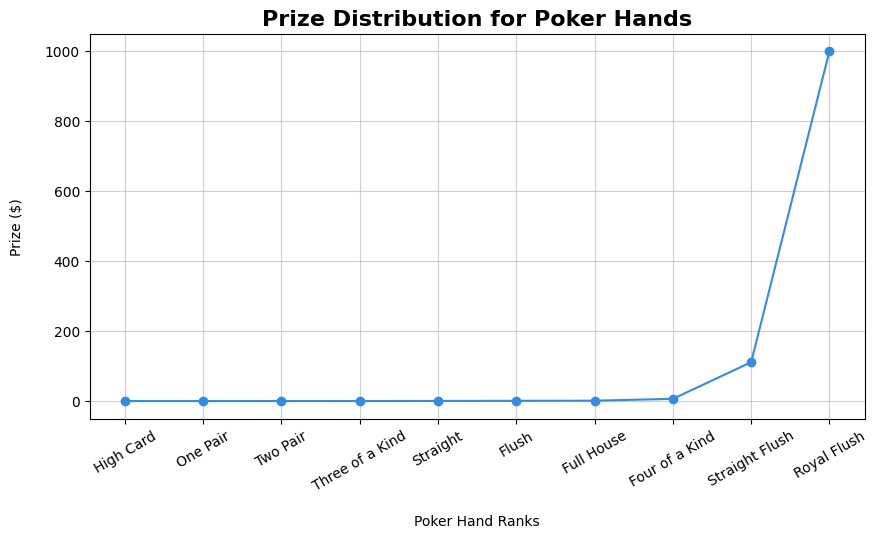

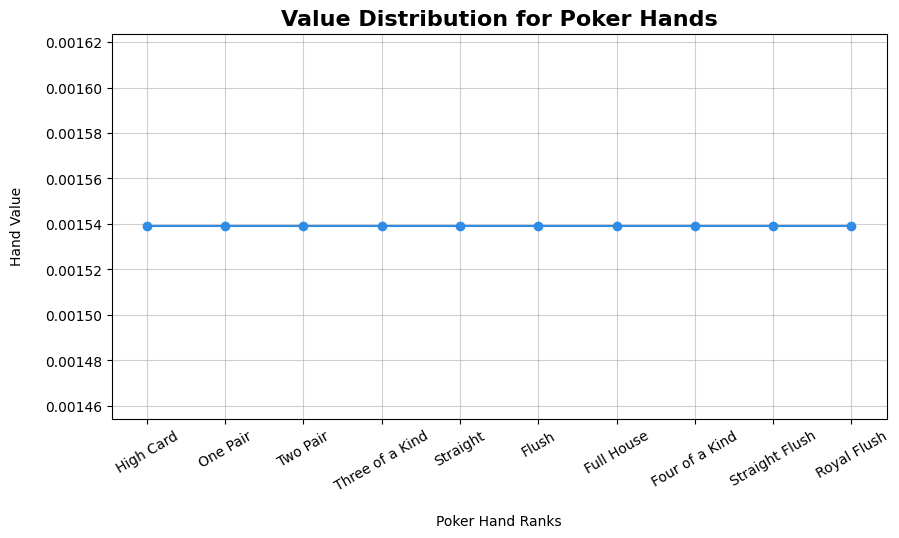

In [11]:
# Make new line graphs
prizes = hand_prize.values()
values = hand_value.values()

plot_hand_data(hands, prizes, 'Poker Hand Ranks', 'Prize ($)', 'Prize Distribution for Poker Hands')
plot_hand_data(hands, values, 'Poker Hand Ranks', 'Hand Value', 'Value Distribution for Poker Hands')

Great! 

All our poker hand types have the same value—so they yield the same prize output after a _very_ large number of draws.

In other words,  
if we had 10 different players, each going after a different poker hand,  
and they were only allowed to play their respective hand ranks,  
then each player would earn $k = \$0.0015$ per draw on average.

__Ex.__  

The `One Hand` player would find his hand every 2 draws on average.

He would earn just $0.3$ &#162; per hand, as we saw before.

This equates to $\frac{0.3}{2} = 0.15$ &#162; or $\$0.0015$ per _draw_.

__Ex.__

The `Royal Flush` player would find his hand every 649,740 draws on average.

However, he would earn a whopping $\$1000$ per hand.

This equates to $\frac{1000}{649,740} = \$0.0015$ per draw.

<br>

Every player would earn $\$k$ per draw on average.

<h2 id="game"><strong>Let's Play A Game</strong></h2>

We will create a class that generates decks for us to play with.

The __rules__ are simple:

- We start with a random draw of 5 cards from a shuffled deck

- We may choose to replace any amount of our cards, twice

- We will be awarded a prize for the hand we play based on our balanced prize system

Let's calculate the odds of going after different hand rankings.

This will let us strategically choose the path forward that earns us the best value (prize for the associated risk).

In [12]:
class Deck:
	RANKS = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
	SUITS = '♠♥♦♣'

	def __init__(self, clone=None):
		''' Initialize a shuffled deck of 52 cards, or create a copy of a `clone` deck. '''
		if clone is not None:
			self.cards = clone.cards.copy()
			return
		self.cards = [(rank + suit) for suit in self.SUITS for rank in self.RANKS]
		self.shuffle()
	
	def shuffle(self):
		''' Randomize the order of the deck. '''
		random.shuffle(self.cards)

	def draw(self, n=1, peek=False):
		''' Pop the top `n` cards from the deck. Return list of popped cards.

			If `peek=True`, return cards (slice) without removing them.
		'''
		if peek:
			return self.cards[:n]
		else:
			hand = self.cards[:n]
			self.cards = self.cards[n:]
		return hand
	
	def copy(self):
		return Deck(clone=self)
	
	# Treat as container
	def __getitem__(self, index):
		return self.cards[index]
	
	def __len__(self):
		''' Return the number of cards left in the deck. '''
		return len(self.cards)

	def __bool__(self):
		''' Return True if the deck has cards, False if it's empty. '''
		return len(self.cards) > 0

	def __str__(self):
		return f'Deck({len(self.cards)} cards remaining)'

	def __repr__(self):
		return f'Deck({len(self.cards)} cards: {self.cards})'
	

In [13]:
random.seed(1) # for reproducibility

deck = Deck()
deck.shuffle() # an extra shuffle for good luck

my_hand = deck.draw(5) # remove cards from deck

def print_hand(hand):
	for card in hand:
		print(card, end=' ')
	print()

print_hand(my_hand)
print(deck)

8♠ 9♥ 7♠ J♦ 5♦ 
Deck(47 cards remaining)


OK, we got:

`J♦ 9♥ 8♠ 7♠ 5♦`

Right now, we have a __High Card__ hand with the `J♦`.

We have no pairs.

### We are missing a `10` to make a __Straight:__

- `J _ 9 8 7`

Hmmm, let's check the odds of replacing our `5♦` for any `10`.

- We will be drawing only 1 card.

- There are 47 cards left in the deck.

- We drew no 10's so we know there are 4 still in the deck.

The probability of drawing any 10 is:

$\dfrac{4}{\dbinom{47}{1}} = \dfrac{4}{47} = 8.51 \%$

Therefore, the probability of not drawing a 10 is:

$\dfrac{43}{47}$

Let's say we didn't get the 10. Then, 46 cards remain in the deck.

We still have the chance to replace our hand one more time.

The probability of drawing a 10 this time is:

$\dfrac{4}{46} = 8.70 \%$

Or, not drawing a 10:

$\dfrac{42}{46}$

Therefore, the chance to draw no 10's both times is:

$\dfrac{43}{47} \cdot \dfrac{42}{46} = 83.53 \%$

And so, the probability of drawing a 10 either time is:

$1 - 0.8353 = 16.47 \%$

So, we have a $16\%$ chance to find a straight, before the game ends.

Odds against finding a straight:

$83.53 \ \text{to} \ 16.47$

$5.07 \ \text{to} \ 1$

### Let's now check the odds of finding a __One Pair.__

Remember, we have `J♦ 9♥ 8♠ 7♠ 5♦`.

There are 47 cards left in the deck.

1. We can replace our `5♦` and try to create a pair with any of our remaining cards.

1.  We can replace all of: `9♥ 8♠ 7♠ 5♦` and focus soley on creating a Jack pair.

Let's assess the odds of each case.

1. We can take 1 of 3 remaining `J`, `9`, `8`, or `7`
	
	There are $3 \cdot 4 = 12$ cards we are looking for.

	We check the probability of _not_ getting a pair on each redraw:

	$\text{P}_1 = \dfrac{47 - 12}{47} = \dfrac{35}{47}$

	$\text{P}_2 = \dfrac{46 - 12}{46} = \dfrac{34}{46}$

	The probability of getting a pair before the game ends:

	$1 - (\text{P}_1 \cdot \text{P}_2) = 1 - (\dfrac{35}{47} \cdot \dfrac{34}{46}) = 44.96 \%$

	<br>

2. We dump all other cards and go after Jacks.

	There are 3 cards we are looking for, but we are now drawing 4 cards each time.

	Again, we will check the probability of _not_ getting a pair:

	$\text{P}_1 = \dfrac{\dbinom{47 - 3}{4}}{\dbinom{47}{4}} \approx 0.7611$

	The deck has $4$ less cards now ($43$ total).

	$\text{P}_2 = \dfrac{\dbinom{43 - 3}{4}}{\dbinom{43}{4}} \approx 0.7405$

	Probability of getting a pair on either redraw:

	$1 - (\text{P}_1 \cdot \text{P}_2) = 43.64 \%$

	<br>

Interesting! 

It's slightly better to replace 1 card looking for a match to any of our remaining cards, rather than replacing all our other cards and going after solely the Jacks.

### Let's check one more option—a __Flush.__

Remember, we have `J♦ 9♥ 8♠ 7♠ 5♦` and 47 cards left in the deck.

We have 2 diamonds.

We can replace `9♥ 8♠ 7♠` looking for 3 diamonds.

This time we directly calculate the probability of finishing the game with a flush, by exploring each case.

On the first redraw, we have:

- $11$ diamonds still in the deck

$P_1(\text{3 diamonds}) = \dfrac{\dbinom{11}{3}}{\dbinom{47}{3}} = \dfrac{(3)(11)(10)(9)}{(3)(47)(46)(45)} = \dfrac{11}{1081}$

<br>

$P_1(\text{2 diamonds}) = \dfrac{\dbinom{11}{2} \dbinom{47-11}{1}}{\dbinom{47}{3}} = \dfrac{(3)(2)(11)(10)(36)}{(2)(47)(46)(45)} = \dfrac{132}{1081}$

<br>

$P_1(\text{1 diamond}) = \dfrac{\dbinom{11}{1} \dbinom{36}{2}}{\dbinom{47}{3}} = \dfrac{(3)(2)(11)(36)(35)}{(2)(47)(46)(45)} = \dfrac{462}{1081}$

<br>

$P_1(\text{0 diamonds}) = \dfrac{\dbinom{36}{3}}{\dbinom{47}{3}} = \dfrac{(3)(2)(36)(35)(34)}{(3)(2)(47)(46)(45)} = \dfrac{476}{1081}$

<br>

If we sum all these probabilities, we should get 1, to show they are mutually exclusive and collectively exhaustive events.

$\dfrac{11 + 132 + 462 + 476}{1081} = \dfrac{1081}{1081}$

Great.

Now, if we get 3 diamonds on the first draw we simply win.  
If not, however, we still have one more chance to draw enough diamonds.

After the first redraw there will be $44$ cards left in the deck.

Let's check the probabilities of finishing our flush on the second redraw:

__Assuming we got 2 diamonds from the first redraw.__

There are $9$ diamonds left in the deck, and we need 1 more.

$P_2(\text{1 diamond}) = \dfrac{\dbinom{9}{1}}{\dbinom{44}{1}} = \dfrac{9}{44}$

<br>

__Assuming we got 1 diamond from the first redraw.__

There are $10$ diamonds left in the deck, and we need 2.

$P_2(\text{2 diamonds}) = \dfrac{\dbinom{10}{2}}{\dbinom{44}{2}} = \dfrac{(2)(10)(9)}{(2)(44)(43)} = \dfrac{45}{946}$

<br>

__Assuming we got no diamonds from the first redraw.__

There are still $11$ diamonds in the deck, and we need 3.

$P_2(\text{3 diamonds}) = \dfrac{\dbinom{11}{3}}{\dbinom{44}{3}} = \dfrac{(3)(2)(11)(10)(9)}{(3)(2)(44)(43)(42)} = \dfrac{15}{1204}$

Now, we check all the paths to victory (5 diamonds) across the two redraws:

$$ \begin{align*}
P_1(\text{3 diamonds}) &= \frac{11}{1081} = \frac{473}{46483} \\ \\

P_1(\text{2 diamonds}) \cdot P_2(\text{1 diamond}) &= \frac{132}{1081} \cdot \frac{9}{44} = \frac{27}{1081} = \frac{1161}{46483} \\ \\

P_1(\text{1 diamond}) \cdot P_2(\text{2 diamonds}) &= \frac{462}{1081} \cdot \frac{45}{946} = \frac{945}{46483} \\ \\

P_1(\text{0 diamonds}) \cdot P_2(\text{3 diamonds}) &= \frac{476}{1081} \cdot \frac{15}{1204} = \frac{255}{46483}
\end{align*}
$$

Finally, we can add all these probabilities together to obtain the total chance of finishing with a flush from our starting hand:

$$ \begin{align*}
P(\text{diamond flush}) &= \frac{473 + 1161 + 945 + 255}{46483} \\ \\
&= \frac{2834}{46483} \\ \\
&= 6.10 \ \%
\end{align*}
$$

### __Recap:__

Target Hand | Prize ($) | Success Rate (%) | Value
------------|----------:|-----------------:|--------:
Straight    | 0.3922	| 16.47 		   | 6.46
One Pair    | 0.0036	| 44.96 		   | 0.16
Flush       | 0.7831	| 6.10 			   | 4.78

There are, of course, other possible hands we can go after (there are mainy possibilities in card games) but let's stick with these just these options.

Which choice has the best _value?_

We previously defined $\text{value} := \text{prize} \times \text{probability}$.

We add the value of each ranking hand to the table.

Remember that the value tells us which hand will earn us the most profit on average after many repeated attempts.

The table reveals that the __Straight__ has the best value.

Despite the __One Pair__ having the greatest chance to find, the prize money of the other hands are so much greater that it justifies their lower probabilities.



### __Let's finish our game!__

We will go after the straight, since it has the best value from our starting position.

In [14]:
saved_deck = deck.copy() # save the state of this deck for later

my_hand.sort(reverse=True) # sort hand in descending order
print_hand(my_hand)

J♦ 9♥ 8♠ 7♠ 5♦ 


In [15]:
# Get rid of the 5. 
# We need a 10.

# Redraw 1
my_hand.pop()
my_hand.extend(deck.draw(1))
my_hand.sort(reverse=True)
print_hand(my_hand)

J♦ J♠ 9♥ 8♠ 7♠ 


We didn't get a `10`, but we actually got a __One Pair__ with the Jacks.

Let's try again for the __Straight__.

In [16]:
# Redraw 2
my_hand.pop(1)
my_hand.extend(deck.draw(1))
my_hand.sort(reverse=True)
print_hand(my_hand)

J♦ A♠ 9♥ 8♠ 7♠ 


Awww, we're left with a __High Card__. 

The odds didn't play in our favor this time.

Let's run a simulation to observe empirically how many times we would actually get the __Straight__ from our starting hand: `J♦ 9♥ 8♠ 7♠ 5♦`.

Remember, we expect to get the __Straight__ $16.47 \ \%$ of the time.

In [17]:
# Any 10 will win us the straight
def run_simulation(attempts):
	straights_found = 0
	for _ in range(attempts):
		deck = saved_deck.copy()	# 47 cards remain
		deck.shuffle()				# randomize the order of the 47
		
		# 2 redraws
		for _ in range(2):
			new_card = deck.draw(1)[0]
			if '10' in new_card:
				straights_found += 1
				break
	return straights_found

# Play the game 10000 times per simulation
n = 10000
straights = run_simulation(n)
print(f'Found straights {straights}/{n} = {straights/n} of the time.')

Found straights 1647/10000 = 0.1647 of the time.


Seems like our theoretical calculations were indeed correct.

Finally, let's run the simulation multiple times and plot the empirical distribution of the observed success rates. 

This will approximate the true sampling distribution for random decks of 47 cards (given the same starting hand).

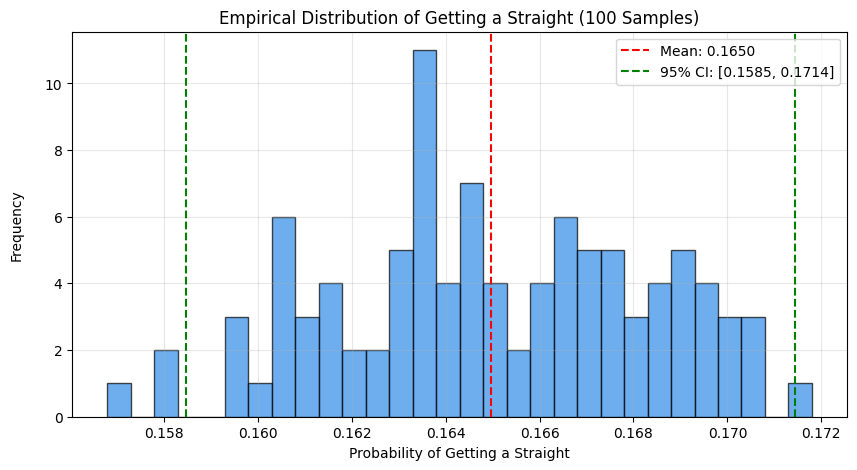

Mean probability: 16.4960%
95% Confidence Interval: [15.8478%, 17.1442%]


In [18]:
import numpy as np

# n is our sample size, for each sample
samples = 100

# A collection of mean proportion statistics
results = [run_simulation(n) / n for _ in range(samples)]

# Statistics of the approximate samping distribution
mean = np.mean(results)
std_error = np.std(results) # / np.sqrt(samples)

# 95% Confidence interval for population proportion (of successful straights drawn)
conf_interval = (
	mean - 1.96 * std_error,
	mean + 1.96 * std_error 
)

# Plot histogram of results
plt.figure(figsize=(10, 5))
plt.hist(results, bins=30, color='#318ce7', alpha=0.7, edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', label=f'Mean: {mean:.4f}')
plt.axvline(conf_interval[0], color='green', linestyle='dashed', label=f'95% CI: [{conf_interval[0]:.4f}, {conf_interval[1]:.4f}]')
plt.axvline(conf_interval[1], color='green', linestyle='dashed')
plt.xlabel('Probability of Getting a Straight')
plt.ylabel('Frequency', labelpad=15)
plt.title(f'Empirical Distribution of Getting a Straight ({samples} Samples)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print results
print(f'Mean probability: {mean:.4%}')
print(f'95% Confidence Interval: [{conf_interval[0]:.4%}, {conf_interval[1]:.4%}]')